In [1]:
import os
import math

import pandas as pd
import numpy as np

import sys
sys.path.append("..") # Adds higher directory to python modules path.
from Jetson.autopilot.record.AutopilotGUI import AutopilotGUI

In [2]:
datasets_path = "../notebooks/datasets/train/"
sub_dirs = os.listdir(datasets_path)
dataset_paths = [[datasets_path + sub_dir + "/" + sub_dir + ".csv", datasets_path + sub_dir + "/frames/"] for sub_dir in sub_dirs]
dataset_paths

[['../notebooks/datasets/train/Sun Dec 27 18_09_33 2020/Sun Dec 27 18_09_33 2020.csv',
  '../notebooks/datasets/train/Sun Dec 27 18_09_33 2020/frames/'],
 ['../notebooks/datasets/train/Sun Dec 27 17_46_56 2020/Sun Dec 27 17_46_56 2020.csv',
  '../notebooks/datasets/train/Sun Dec 27 17_46_56 2020/frames/'],
 ['../notebooks/datasets/train/Sun Feb 21 21:50:50 2021/Sun Feb 21 21:50:50 2021.csv',
  '../notebooks/datasets/train/Sun Feb 21 21:50:50 2021/frames/'],
 ['../notebooks/datasets/train/Sun Dec 27 18_01_53 2020/Sun Dec 27 18_01_53 2020.csv',
  '../notebooks/datasets/train/Sun Dec 27 18_01_53 2020/frames/'],
 ['../notebooks/datasets/train/Wed Dec 30 17_34_37 2020/Wed Dec 30 17_34_37 2020.csv',
  '../notebooks/datasets/train/Wed Dec 30 17_34_37 2020/frames/'],
 ['../notebooks/datasets/train/Sun Jan 10 11:31:18 2021/Sun Jan 10 11:31:18 2021.csv',
  '../notebooks/datasets/train/Sun Jan 10 11:31:18 2021/frames/'],
 ['../notebooks/datasets/train/Sun Dec 27 18_25_24 2020/Sun Dec 27 18_25_24 

In [3]:
from RoadDataset import RoadDataset

In [4]:
dataset_index = 5
column_names = ['filename','steering_wheel_angle','speed', 'blink_l', 'blink_r']
dataset = RoadDataset(dataset_paths[dataset_index][0], dataset_paths[dataset_index][1], column_names, mode='train')

Reading csv file: ../notebooks/datasets/train/Sun Jan 10 11:31:18 2021/Sun Jan 10 11:31:18 2021.csv
Loaded dataset with 17985 samples


In [5]:
stats = dataset.get_csv().describe()
stats = stats.transpose()
stats

,count,mean,std,min,25%,50%,75%,max
steering_wheel_angle,17985.0,-1.271925,27.401124,-200.10,-6.570,-1.440,2.130,160.090
speed,17985.0,61.857026,18.846622,11.47,46.996,59.055,76.663,103.323
blink_l,17985.0,0.006950,0.083080,0.00,0.000,0.000,0.000,1.000
blink_r,17985.0,0.019016,0.136584,0.00,0.000,0.000,0.000,1.000


In [6]:
#dataset.pairplot()

In [7]:
dataset.clean()

Cleaning dataset. Starting with 17985 samples.
Removing 439 rows for reason: Low speed (< 25 km/h)
Removing 821 rows for reason: High SWA (> +45/ < -45 deg)
Removing 68 rows for reason: Left blinker on
Removing 151 rows for reason: Right blinker on
16506 samples remaining.


In [8]:
stats = dataset.get_csv().describe()
stats = stats.transpose()
stats

,count,mean,std,min,25%,50%,75%,max
steering_wheel_angle,16506.0,-1.856281,11.589330,-44.890,-5.82000,-1.440,1.630,44.830
speed,16506.0,64.145716,17.278519,25.048,48.98775,61.628,77.903,103.323
blink_l,16506.0,0.000000,0.000000,0.000,0.00000,0.000,0.000,0.000
blink_r,16506.0,0.000000,0.000000,0.000,0.00000,0.000,0.000,0.000


In [9]:
#dataset.pairplot()

In [10]:
#dataset.balance()

In [11]:
#dataset.pairplot()

In [12]:
stats = dataset.get_csv().describe()
stats = stats.transpose()
stats

,count,mean,std,min,25%,50%,75%,max
steering_wheel_angle,16506.0,-1.856281,11.589330,-44.890,-5.82000,-1.440,1.630,44.830
speed,16506.0,64.145716,17.278519,25.048,48.98775,61.628,77.903,103.323
blink_l,16506.0,0.000000,0.000000,0.000,0.00000,0.000,0.000,0.000
blink_r,16506.0,0.000000,0.000000,0.000,0.00000,0.000,0.000,0.000


In [13]:
stats = dataset.get_csv().describe()
stats = stats.transpose()
stats

,count,mean,std,min,25%,50%,75%,max
steering_wheel_angle,16506.0,-1.856281,11.589330,-44.890,-5.82000,-1.440,1.630,44.830
speed,16506.0,64.145716,17.278519,25.048,48.98775,61.628,77.903,103.323
blink_l,16506.0,0.000000,0.000000,0.000,0.00000,0.000,0.000,0.000
blink_r,16506.0,0.000000,0.000000,0.000,0.00000,0.000,0.000,0.000


In [14]:
swas = dataset.get_csv()['steering_wheel_angle']
np.mean(abs(swas))/90

0.08421203737361498

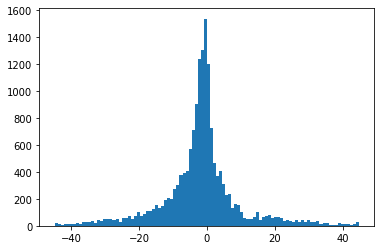

In [15]:
swas = np.array(dataset.get_csv()['steering_wheel_angle'])

from matplotlib import pyplot as plt

plt.hist(swas, bins = 100)
plt.show()

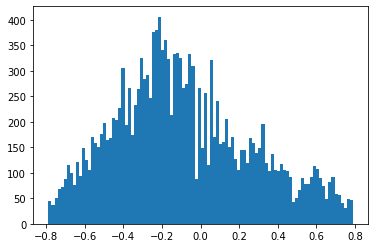

In [16]:
log_normed_swas = [dataset.normalize_swa(swa) for swa in swas]
plt.hist(log_normed_swas, bins = 100)
plt.show()

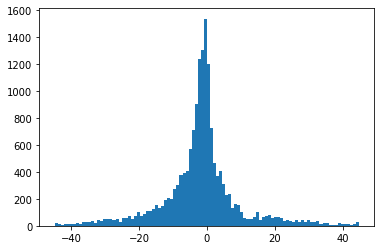

In [17]:
denormed_swas = [dataset.denormalize_swa(swa) for swa in log_normed_swas]
plt.hist(denormed_swas, bins = 100)
plt.show()

In [29]:
error = denormed_swas - swas
print(max(error))

1.0658141036401503e-14


In [18]:
gui = AutopilotGUI()
batch_gui = AutopilotGUI()

In [19]:
from tensorflow.keras.preprocessing.image import img_to_array

In [20]:
def show_frame(index, lateral_shift=0, horizontal_rotation=0):
    
    sample = dataset.get_sample(index)
    frame = sample['frame']
    velocity = sample['v_vehicle']
    orig_swa = sample['swa']
    
    
    
    frame, aug_swa = dataset.augment_sample(frame, orig_swa, velocity, lateral_shift, horizontal_rotation)
    
    
    
    
    gui.set_frame(frame)
    gui.set_show_overlay(True)
    gui.set_engaged(False)
    gui.set_recording(True)
    
    blink_l = sample['blink_l']
    gui.set_indicator_left(blink_l)
    blink_r = sample['blink_r']
    gui.set_indicator_right(blink_r)
    #gui.set_cruise_control(cruise_control)
    #gui.set_cruise_control_setpoint(cc_setpoint)
    
    
    gui.set_velocity(velocity)
    
    timestamp = sample['filename']
    gui.set_timestring(timestamp)
    
    
    
    gui.set_actual_swa(aug_swa)
    gui.set_predicted_swa(orig_swa)
#    gui.set_predicted_swa(aug_swa)
    
    gui.show_jupyter()
    
    
from matplotlib import pyplot as plt
    
def show_crop(index, shift, offset):
    frame = img_to_array(dataset.get_cropped_frame(index, shift, offset)[0])
    plt.imshow(frame/255)
    plt.show()
    
    
def show_batch(batch_index, frame_index):
    
    batch = dataset[batch_index]
    samples = batch[0]
    labels = batch[1]

    images = samples[0]
    velocities = samples[1]



    frame = images[frame_index]
    vel = velocities[frame_index]
    actual_swa = labels[frame_index]

    batch_gui.set_frame(frame)
    batch_gui.set_show_overlay(True)
    batch_gui.set_engaged(False)
    batch_gui.set_recording(True)
    
    
    #velocity = dataset.get_velocity(index)
    batch_gui.set_velocity(vel)
    
    #timestamp = dataset.get_timestamp(index)
    #batch_gui.set_timestring(timestamp)
    
    
    #actual_swa = dataset.get_swa(index)*90
    print("actual_swa: " + str(actual_swa))
    #batch_gui.set_actual_swa(actual_swa)
    batch_gui.set_predicted_swa(actual_swa)
    
    batch_gui.show_jupyter()

In [21]:
import ipywidgets as widgets
frame_slider = widgets.IntSlider(min=0, max=dataset.get_batch_size()*len(dataset)-1, continuous_update=False)
lateral_shift_slider = widgets.FloatSlider(min=-1, max=1, continuous_update=False)
horizontal_rotation_slider = widgets.FloatSlider(min=-10, max=10, continuous_update=False)

In [22]:
from ipywidgets import interact

interact(show_frame, index=frame_slider, lateral_shift=lateral_shift_slider, horizontal_rotation=horizontal_rotation_slider);

interactive(children=(IntSlider(value=0, continuous_update=False, description='index', max=16495), FloatSlider…

In [23]:
batch_slider = widgets.IntSlider(min=0, max=len(dataset)-1, continuous_update=False)
batch_frame_slider = widgets.IntSlider(min=0, max=dataset.get_batch_size()-1, continuous_update=False)

interact(show_batch, batch_index=batch_slider, frame_index=batch_frame_slider);

interactive(children=(IntSlider(value=0, continuous_update=False, description='batch_index', max=1030), IntSli…

In [24]:
crop_slider = widgets.IntSlider(min=0, max=dataset.get_batch_size()*len(dataset)-1, continuous_update=False)
shift_slider = widgets.IntSlider(min=-100, max=100, continuous_update=False)
offset_slider = widgets.IntSlider(min=-100, max=100, continuous_update=False)

In [25]:
interact(show_crop, index=crop_slider, shift = shift_slider, offset = offset_slider);

interactive(children=(IntSlider(value=0, continuous_update=False, description='index', max=16495), IntSlider(v…

In [26]:
train_stats = dataset.get_csv().describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
steering_wheel_angle,16506.0,-1.856281,11.589330,-44.890,-5.82000,-1.440,1.630,44.830
speed,16506.0,64.145716,17.278519,25.048,48.98775,61.628,77.903,103.323
blink_l,16506.0,0.000000,0.000000,0.000,0.00000,0.000,0.000,0.000
blink_r,16506.0,0.000000,0.000000,0.000,0.00000,0.000,0.000,0.000


In [5]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
img = load_img('red.jpg', color_mode='rgb')
frame = img_to_array(img, dtype=np.uint8)

In [6]:
print(frame)

[[[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 ...

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]]
